In [1]:
from experiment import Experiment
import torch
torch.manual_seed(2)
%matplotlib inline

In [2]:
var_dict = dict(
    categorical_vars = ['Work_accident', 'promotion_last_5years', 'sales', 
                        'salary'],
    numerical_vars = ['satisfaction_level', 'last_evaluation', 'average_montly_hours'
                     ,'number_project','time_spend_company'],
    class_var = 'left'
)

In [3]:
exp = Experiment('data/HR_comma_sep.csv',
                 var_dict,
                 embedding_dim=4,
                 lr=5e-3,
                 weight_decay=1e-7,
                 batch_size=1024,
                 n_epoch=100,
                 verbose=False,
                 n_bins_range=range(2, 21),
                 n_init_bins_list=[10,15,20,25,30])

In [ ]:
%time clf_scores = exp.test_classification_performance(cv=3)

In [ ]:
exp.print_classification_scores(clf_scores, method='dummy_only')

In [ ]:
exp.print_classification_scores(clf_scores, method='scale_numeric')

In [ ]:
exp.print_classification_scores(clf_scores, method='equal_width')

In [ ]:
exp.print_classification_scores(clf_scores, method='equal_freq')

In [ ]:
exp.print_classification_scores(clf_scores, method='semantic_binning')

In [ ]:
%time clustering_scores = exp.test_clustering_performance()

In [ ]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

In [10]:
# exp.semantic_binning.visualize_bin_embeddings()

In [4]:
from data_handler import DataHandler
handler = DataHandler(exp.data, exp.var_dict)
from semantic_binning import SemanticBinning
sb = SemanticBinning(handler.var_dict, embedding_dim=4, batch_size=1024, 
                     n_epoch=100, lr=5e-3, weight_decay=1e-7, verbose=True)
sb.fit(exp.data, n_init_bins=15)

>>> Epoch = 1, Loss = 0.34598296880722046
[7, 4, 13, 4, 2]
>>> Epoch = 2, Loss = 0.28030097484588623
[13, 6, 11, 3, 2]
>>> Epoch = 3, Loss = 0.27306848764419556
[5, 6, 11, 3, 5]
>>> Epoch = 4, Loss = 0.2687893211841583
[5, 6, 11, 3, 5]
>>> Epoch = 5, Loss = 0.26693490147590637
[5, 6, 11, 3, 5]
>>> Epoch = 6, Loss = 0.266741544008255
[11, 4, 11, 3, 5]
0 5
>>> Epoch = 7, Loss = 0.2689087688922882
[13, 4, 11, 3, 5]
0 5
>>> Epoch = 8, Loss = 0.2650207579135895
[13, 4, 12, 3, 2]
0 5
>>> Epoch = 9, Loss = 0.2657565474510193
[11, 4, 12, 2, 2]
0 5
>>> Epoch = 10, Loss = 0.263871967792511
[13, 4, 13, 2, 2]
0 5
>>> Epoch = 11, Loss = 0.2636999487876892
[4, 4, 13, 2, 2]
0 5
>>> Epoch = 12, Loss = 0.26538601517677307
[4, 5, 11, 2, 2]
0 5
>>> Epoch = 13, Loss = 0.264392226934433
[4, 5, 4, 2, 2]
0 5
>>> Epoch = 14, Loss = 0.26298755407333374
[4, 5, 14, 2, 2]
0 5
>>> Epoch = 15, Loss = 0.26420342922210693
[4, 7, 14, 2, 2]
0 5
>>> Epoch = 16, Loss = 0.26016730070114136
[4, 7, 4, 2, 2]
0 5
>>> Epoch = 

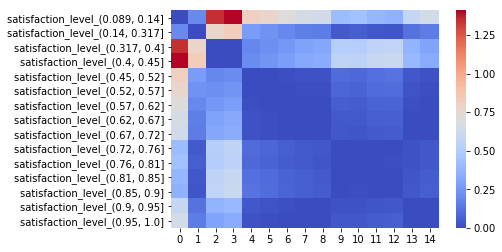

In [5]:
sb.plot_pairwise_distance_between_bins('satisfaction_level')

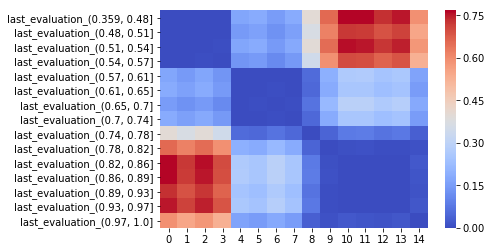

In [6]:
sb.plot_pairwise_distance_between_bins('last_evaluation')

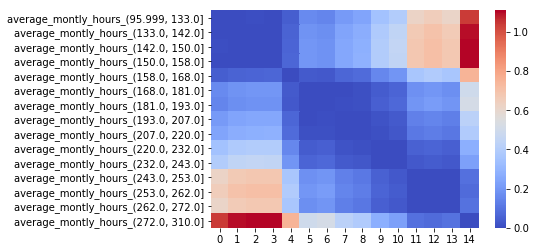

In [7]:
sb.plot_pairwise_distance_between_bins('average_montly_hours')

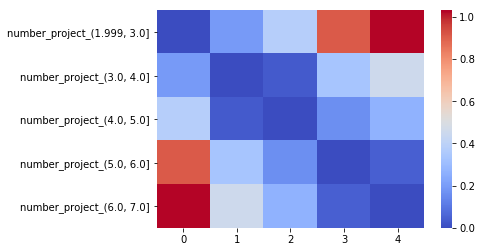

In [8]:
sb.plot_pairwise_distance_between_bins('number_project')

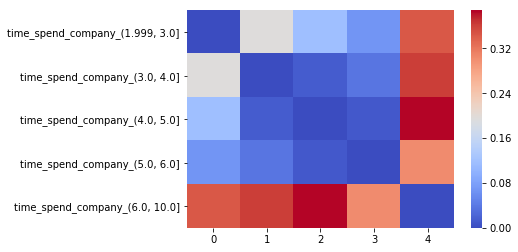

In [9]:
sb.plot_pairwise_distance_between_bins('time_spend_company')

In [10]:
for var, bins in sb.bins_by_var.items():
    print(var)
    print(bins['bins'])

satisfaction_level
['(0.089, 0.14]', '(0.14, 0.317]', '(0.317, 0.45]', '(0.45, 1.0]']
last_evaluation
['(0.359, 0.57]', '(0.57, 0.78]', '(0.78, 1.0]']
average_montly_hours
['(95.999, 158.0]', '(158.0, 168.0]', '(168.0, 193.0]', '(193.0, 220.0]', '(220.0, 243.0]', '(243.0, 272.0]', '(272.0, 310.0]']
number_project
['(1.999, 3.0]', '(3.0, 5.0]', '(5.0, 7.0]']
time_spend_company
['(1.999, 6.0]', '(6.0, 10.0]']


In [11]:
### 학습된 트리의 깊이, 형태 비교

In [12]:
# dot_data = StringIO()
# export_graphviz(dt, out_file=dot_data, feature_names=X.columns, 
#                 impurity=False, proportion=True)
# graph = pydot.graph_from_dot_data(dot_data.getvalue())